In [1]:
# importing useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os

# Prepare: Loading data

In [2]:
# Data file location
os.listdir()
# Load the csv datafile
df = pd.DataFrame(pd.read_csv('AI_index_db.csv'))
df.head()

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,Power players,High,Liberal democracy
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Power players,Upper middle,Closed autocracy
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,Traditional champions,High,Liberal democracy
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,Traditional champions,High,Liberal democracy
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,Rising stars,High,Liberal democracy


# Exploratory Data Analysis

In [3]:
df.shape

(62, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                62 non-null     object 
 1   Talent                 62 non-null     float64
 2   Infrastructure         62 non-null     float64
 3   Operating Environment  62 non-null     float64
 4   Research               62 non-null     float64
 5   Development            62 non-null     float64
 6   Government Strategy    62 non-null     float64
 7   Commercial             62 non-null     float64
 8   Total score            62 non-null     float64
 9   Region                 62 non-null     object 
 10  Cluster                62 non-null     object 
 11  Income group           62 non-null     object 
 12  Political regime       62 non-null     object 
dtypes: float64(8), object(5)
memory usage: 6.4+ KB


In [5]:
df.describe()

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,16.803065,63.503710,66.925484,16.610000,14.824677,57.865645,6.171935,23.914677
std,15.214963,20.217525,20.000424,17.413996,19.419279,26.252448,14.029632,15.123586
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.365000,55.857500,58.107500,3.032500,1.202500,41.030000,0.697500,14.805000
50%,13.445000,65.230000,69.505000,12.930000,9.005000,63.930000,2.585000,23.220000
75%,24.567500,75.947500,80.500000,25.412500,19.980000,77.952500,5.307500,30.487500
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


# Process: Data Cleaning

In [6]:
# checks for null data
df.isnull().sum()
# no null values in the dataset  => don't need to execute the below (just for revision)
# df.dropna(axis=0,how='any',inplace=True)

Country                  0
Talent                   0
Infrastructure           0
Operating Environment    0
Research                 0
Development              0
Government Strategy      0
Commercial               0
Total score              0
Region                   0
Cluster                  0
Income group             0
Political regime         0
dtype: int64

In [7]:
# checks for duplicate
df.duplicated().value_counts()
# the dataset has no duplicated data => no need for executing the below
# df.drop_duplicates(inplace=True)

False    62
dtype: int64

# Ask

What insights can be gained from the dataframe and how?
1. What is the country with highest AI Global Index total score? 
2. Are there any correlations between country's status(region, cluster, income-group and political party) and its total score?
3. What's the relationship amongst measuring figures? Are there any significant interconnected effects that one has on the other?

# Analyze and Visualiza Data

In [8]:
# Question 1
country_score = df.loc[:,(['Country', 'Total score'])]
country_score[:20].sort_values(by='Total score', ascending=False).style.background_gradient()

,Country,Total score
0,United States of America,100.000000
1,China,62.920000
2,United Kingdom,40.930000
3,Canada,40.190000
4,Israel,39.890000
5,Singapore,38.670000
6,South Korea,38.600000
7,The Netherlands,36.350000
8,Germany,36.040000
9,France,34.420000


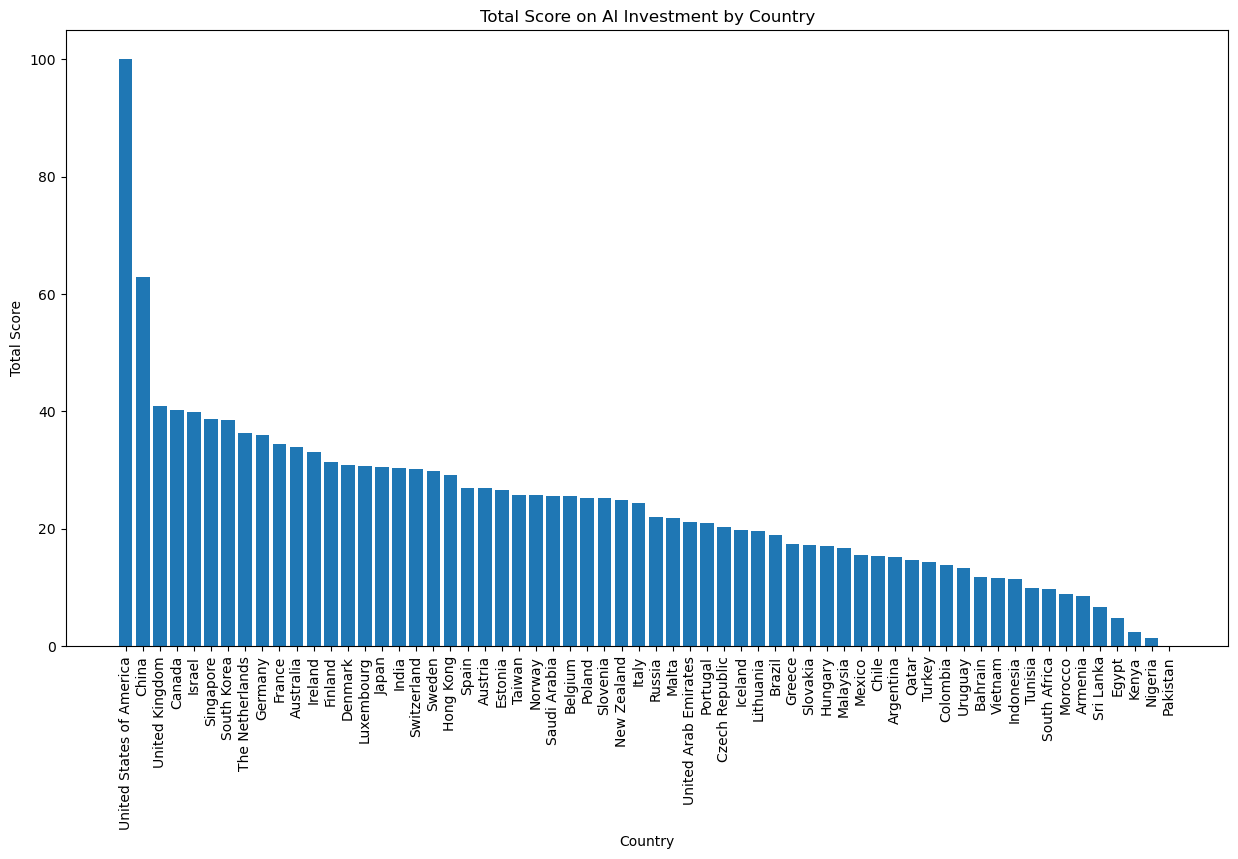

In [9]:
plt.figure(figsize=(15,8))
plt.bar(country_score['Country'],country_score['Total score'])
plt.title('Total Score on AI Investment by Country')
plt.ylabel('Total Score')
plt.xlabel('Country')
plt.xticks(rotation=90);

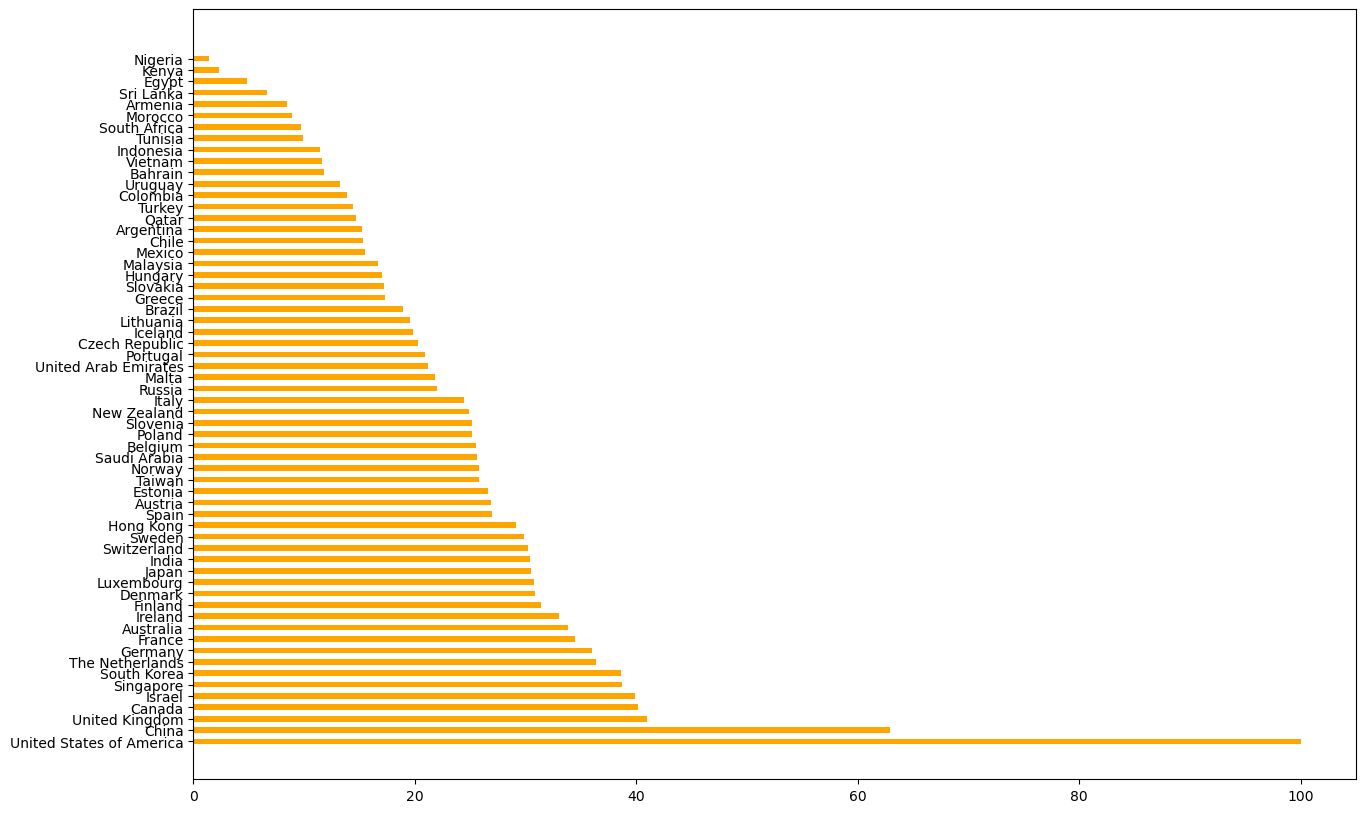

In [10]:
plt.figure(figsize=(15,10))
plt.barh(country_score['Country'],country_score['Total score'], height=0.5, color='orange')
plt.yticks(np.arange(0, 61, step=1),rotation=0);

We can see that the most highly-rated country on AI Investment is the USA, follows by China, the UK, Canada and Israel. The lowest are Nigeria, Kenya, Egypt,...

In [11]:
# Now let's dive into the 2nd question about country's metadata
print(df['Region'].unique())
print(df['Cluster'].unique())
print(df['Income group'].unique())
print(df['Political regime'].unique())

['Americas' 'Asia-Pacific' 'Europe' 'Middle East' 'Africa']
['Power players' 'Traditional champions' 'Rising stars' 'Waking up'
 'Nascent']
['High' 'Upper middle' 'Lower middle']
['Liberal democracy' 'Closed autocracy' 'Electoral democracy'
 'Electoral autocracy']


In [12]:
# Create dataframe for Region and Cluster
region_cluster = df[['Cluster','Region']].groupby(['Region']).value_counts().reset_index().rename(columns={0:"count"})

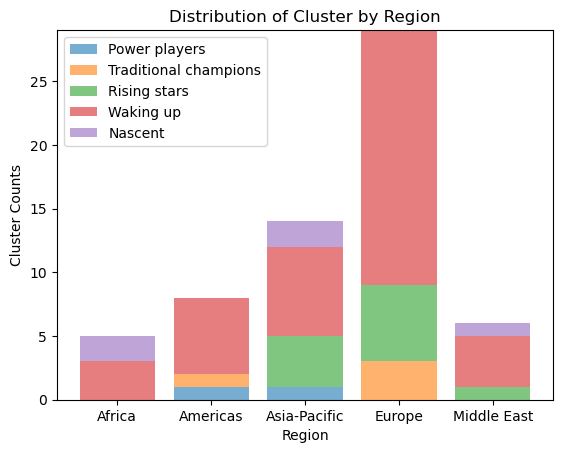

In [13]:
# Process it
results=dict()
for i in range(len(region_cluster.index)):
    cluster_name = ['Power players','Traditional champions','Rising stars','Waking up','Nascent']
    if region_cluster.iloc[i,0] not in results.keys():
        results[region_cluster.iloc[i,0]] = [0,0,0,0,0]
        index = [cluster_name.index(x) for x in cluster_name if x==region_cluster.iloc[i,1]]
        results[region_cluster.iloc[i,0]][index[0]] = region_cluster.iloc[i,2]
    else:
        index = [cluster_name.index(x) for x in cluster_name if x==region_cluster.iloc[i,1]]
        results[region_cluster.iloc[i,0]][index[0]] = region_cluster.iloc[i,2]

result_df = pd.DataFrame(results, index=['Power players','Traditional champions','Rising stars','Waking up','Nascent']).reset_index().rename(columns={'index':'Cluster'})

# Now let'plot a stacked bar chart for easier comparision/ grouped bar chart or a heatma
# 1. Stacked bar chart for Region and Cluster

plt.figure()
plt.bar(result_df.columns[1:],result_df.loc[0,'Africa':'Middle East'],label='Power players', alpha=0.6)
for i in range(1,len(result_df.index)):
    
    current_col = result_df.loc[i,'Africa':'Middle East']
    
    below=pd.DataFrame(result_df.loc[0:i-1,'Africa':'Middle East'])
    below=np.array(below.sum())
    
    label=result_df.loc[i,'Cluster']
    
    plt.bar(result_df.columns[1:],current_col,bottom=below,label=label, alpha=0.6)
    
plt.legend()
plt.title('Distribution of Cluster by Region')
plt.xlabel('Region')
plt.ylabel('Cluster Counts')
plt.show()

In [14]:
# 2. Grouped bar chart from (Region and Income Group) 
region_income = df[['Income group','Region']].groupby(['Region']).value_counts().reset_index().rename(columns={0:"count"})

results=dict()
for i in range(len(region_income.index)):
    cluster_name = ['Americas', 'Asia-Pacific', 'Europe', 'Middle East','Africa']
    if region_income.iloc[i,1] not in results.keys():
        results[region_income.iloc[i,1]] = [0,0,0,0,0]
        index = [cluster_name.index(x) for x in cluster_name if x==region_income.iloc[i,0]]
        results[region_income.iloc[i,1]][index[0]] = region_income.iloc[i,2]
    else:
        index = [cluster_name.index(x) for x in cluster_name if x==region_income.iloc[i,0]]
        results[region_income.iloc[i,1]][index[0]] = region_income.iloc[i,2]
results

{'Lower middle': [0, 5, 0, 1, 4],
 'Upper middle': [4, 2, 2, 0, 1],
 'High': [4, 7, 27, 5, 0]}

In [15]:
region_income

,Region,Income group,count
0,Africa,Lower middle,4
1,Africa,Upper middle,1
2,Americas,High,4
3,Americas,Upper middle,4
4,Asia-Pacific,High,7
5,Asia-Pacific,Lower middle,5
6,Asia-Pacific,Upper middle,2
7,Europe,High,27
8,Europe,Upper middle,2
9,Middle East,High,5


<Figure size 640x480 with 0 Axes>

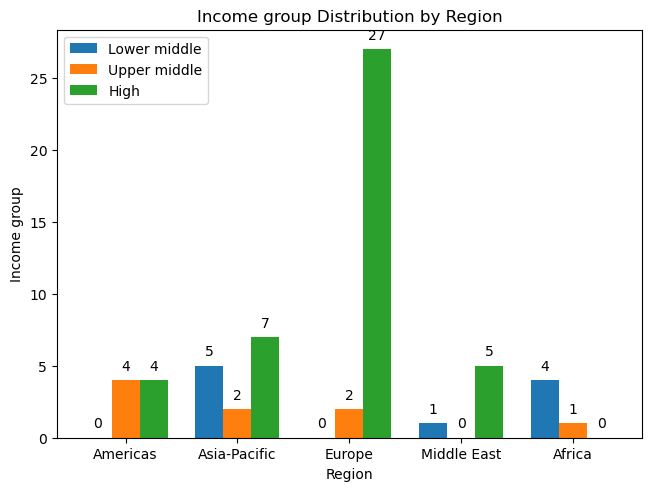

In [16]:
# Now let's plot
# with this visualization, we can see that only Africa doesn't have High Income groups, now let's dive into the details.

plt.figure()
x = np.arange(len(cluster_name))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in results.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=5)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Income group')
ax.set_title('Income group Distribution by Region')
ax.set_xlabel('Region')
ax.set_xticks(x + width, cluster_name)
ax.legend(loc='upper left')

plt.show()

So, we've figured out the trend of Income group based on Region with Europe has the largest High Income group, followed by Asia-Pacific, Middle East and Americas (currency-free). On the other hand, Asia-Pacific and Africa has a higher rate of lower middle income group

In [17]:
# 3. Grouped bar chart for Region and Political Regime
region_politic = df[['Political regime','Region']].groupby(['Region']).value_counts().reset_index().rename(columns={0:"count"})
cluster_name = ['Americas', 'Asia-Pacific', 'Europe', 'Middle East','Africa']

results=dict()
for i in range(len(region_politic.index)):
    if region_politic.iloc[i,1] not in results.keys():
        results[region_politic.iloc[i,1]] = [0,0,0,0,0]
        index = [cluster_name.index(x) for x in cluster_name if x==region_politic.iloc[i,0]]
        results[region_politic.iloc[i,1]][index[0]] = region_politic.iloc[i,2]
    else:
        index = [cluster_name.index(x) for x in cluster_name if x==region_politic.iloc[i,0]]
        results[region_politic.iloc[i,1]][index[0]] = region_politic.iloc[i,2]
results = pd.DataFrame(results,index=[x for x in cluster_name]).reset_index().rename(columns={'index':'Region'})
results

,Region,Electoral autocracy,Electoral democracy,Closed autocracy,Liberal democracy
0,Americas,0,4,0,4
1,Asia-Pacific,3,4,2,5
2,Europe,2,10,0,17
3,Middle East,1,0,4,1
4,Africa,2,2,1,0


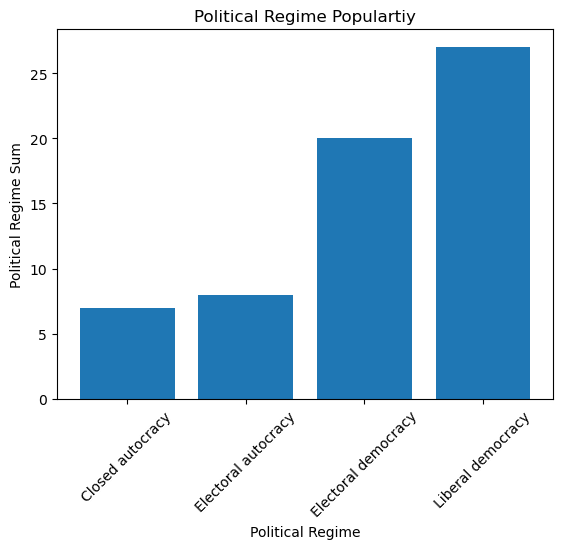

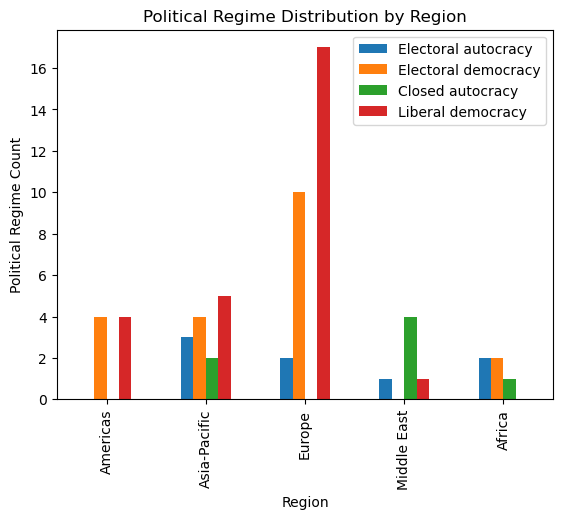

In [18]:
region_poli = df[['Political regime','Region']].groupby(['Political regime']).count().reset_index().rename(columns={0:"count"})
plt.bar(region_poli['Political regime'],region_poli['Region'])
plt.xticks(rotation=45)
plt.xlabel('Political Regime')
plt.ylabel('Political Regime Sum')
plt.title('Political Regime Populartiy')

results.plot(x='Region',
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph with dataframe')
plt.xlabel('Region')
plt.ylabel('Political Regime Count')
plt.title('Political Regime Distribution by Region')
plt.show()

So we can see that the Liberal democracy is the most common form of Political regime and exists greatly in Europe, Asia-Pacific asn Americ. The Closed Autocracy is the main political regime in Middle East.

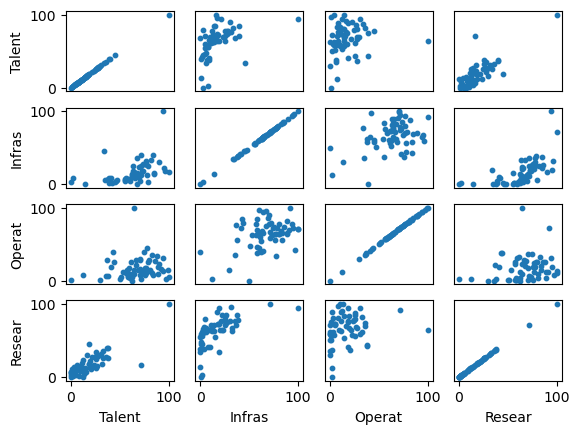

In [19]:
# Now let's move to analyze the many aspects when measuring the Level of AI Investment using a scatter plot matrix (SPLOM)
# Using SPLOM will help us to undestand the correlation between different attributes in a dataset.
# Because the dataset has up to 8 columns of information about the measurements of AI Investment => split into 2 SPLOMs
cols=['Talent', 'Infrastructure', 'Operating Environment', 'Research']

fig, ax = plt.subplots(len(cols), len(cols))
for i in range(len(cols)):
    for j in range(len(cols)):
        # plot for each row of data
        ax[i,j].scatter(df[cols[i]],df[cols[j]],s=10)
        # remove framing and ticks labels
        ax[i,j].get_xaxis().set_visible(False)
        ax[i,j].get_yaxis().set_visible(False)
        # add labels to the outer most and under most
        if i == len(cols)-1:
            ax[i,j].get_xaxis().set_visible(True)
            ax[i,j].set_xlabel(cols[j][:6])
        if j == 0:
            ax[i,j].get_yaxis().set_visible(True)
            ax[i,j].set_ylabel(cols[i][:6])

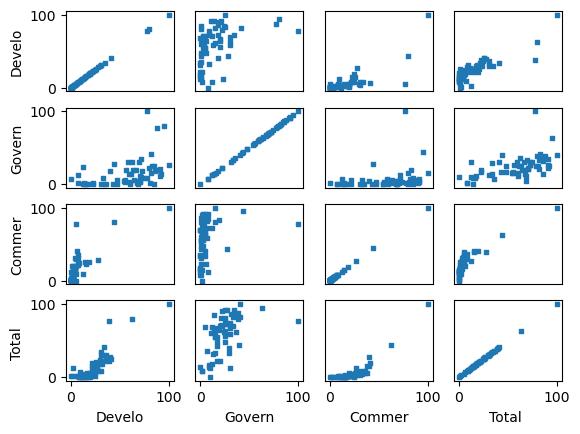

In [20]:
cols=['Development' ,'Government Strategy' ,'Commercial' ,'Total score']

fig, ax = plt.subplots(len(cols), len(cols))
for i in range(len(cols)):
    for j in range(len(cols)):
        # plot for each row of data
        ax[i,j].scatter(df[cols[i]],df[cols[j]],s=10,marker='s')
        # remove framing and ticks labels
        ax[i,j].get_xaxis().set_visible(False)
        ax[i,j].get_yaxis().set_visible(False)
        # add labels to the outer most and under most
        if i == len(cols)-1:
            ax[i,j].get_xaxis().set_visible(True)
            ax[i,j].set_xlabel(cols[j][:6])
        if j == 0:
            ax[i,j].get_yaxis().set_visible(True)
            ax[i,j].set_ylabel(cols[i][:6])

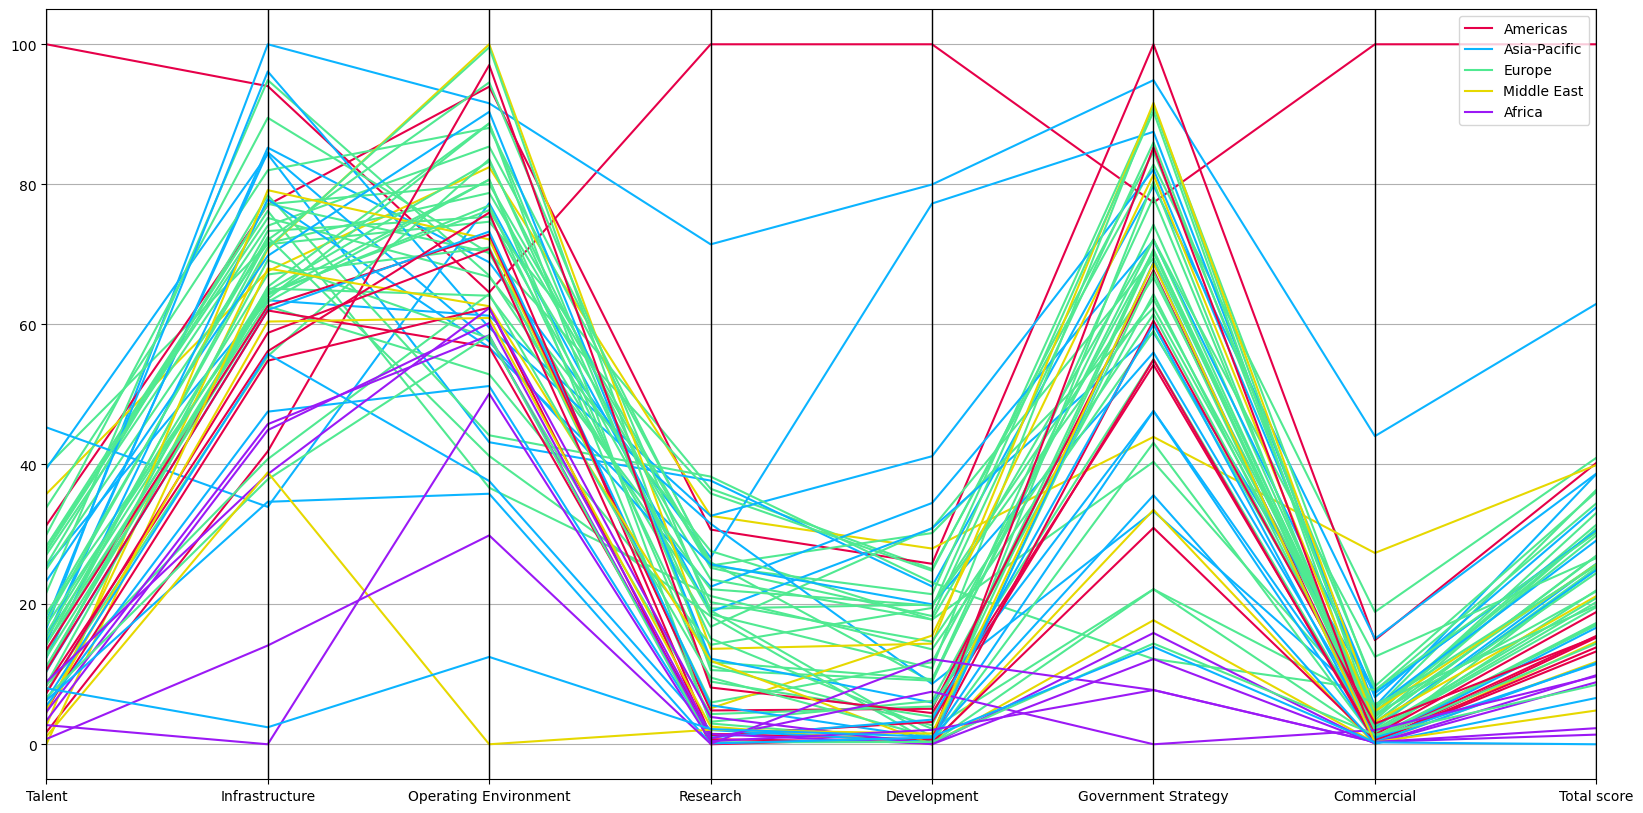

In [21]:
# Now let's use another advanced plotting method specializing for many-attributes-analysis, which will help us see a bigger picture
plt.figure(figsize=(20,10))
pd.plotting.parallel_coordinates(df.iloc[:,1:10], 'Region',color=("#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff"));

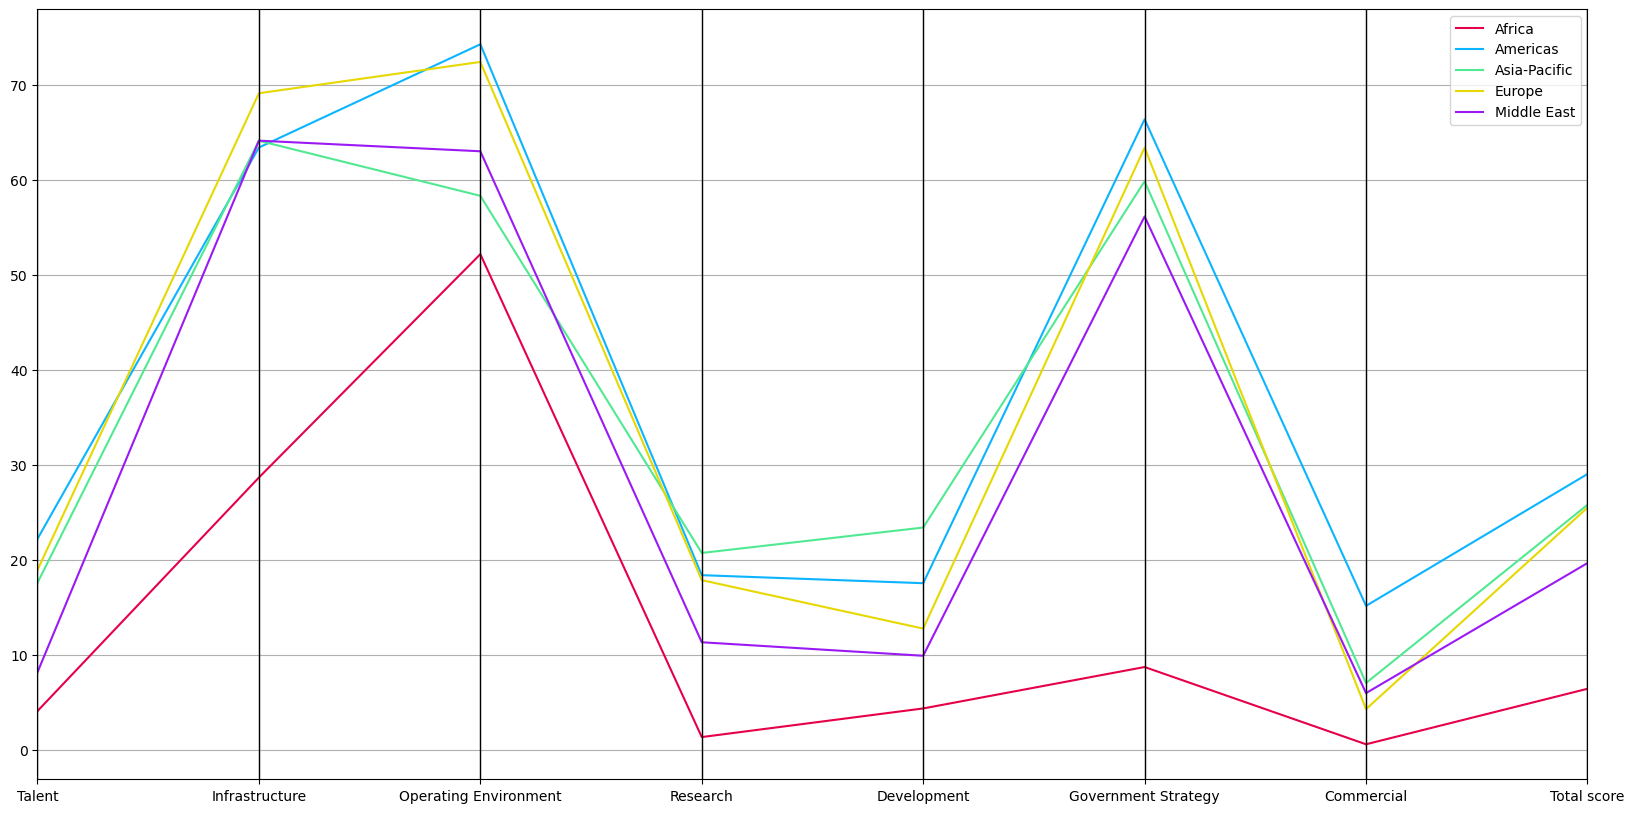

In [22]:
# let's see a more overview trend
summary_df = df.iloc[:,1:10].groupby('Region').mean().reset_index()
plt.figure(figsize=(20,10))
pd.plotting.parallel_coordinates(summary_df, 'Region',color=("#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff"));

Based on the 2 plots, we can see a clear patterns that Research, Development, Talent and Commercial are some most abandoned attributes. In contrast with that, Infrastructure, Operating Environment and Government Strategy are some most outstanding fields. However, we can see that in the 1st visualization, there are some outlier cases that have unhomogeneous patterns amongst attributes => boxplot to identify outliers

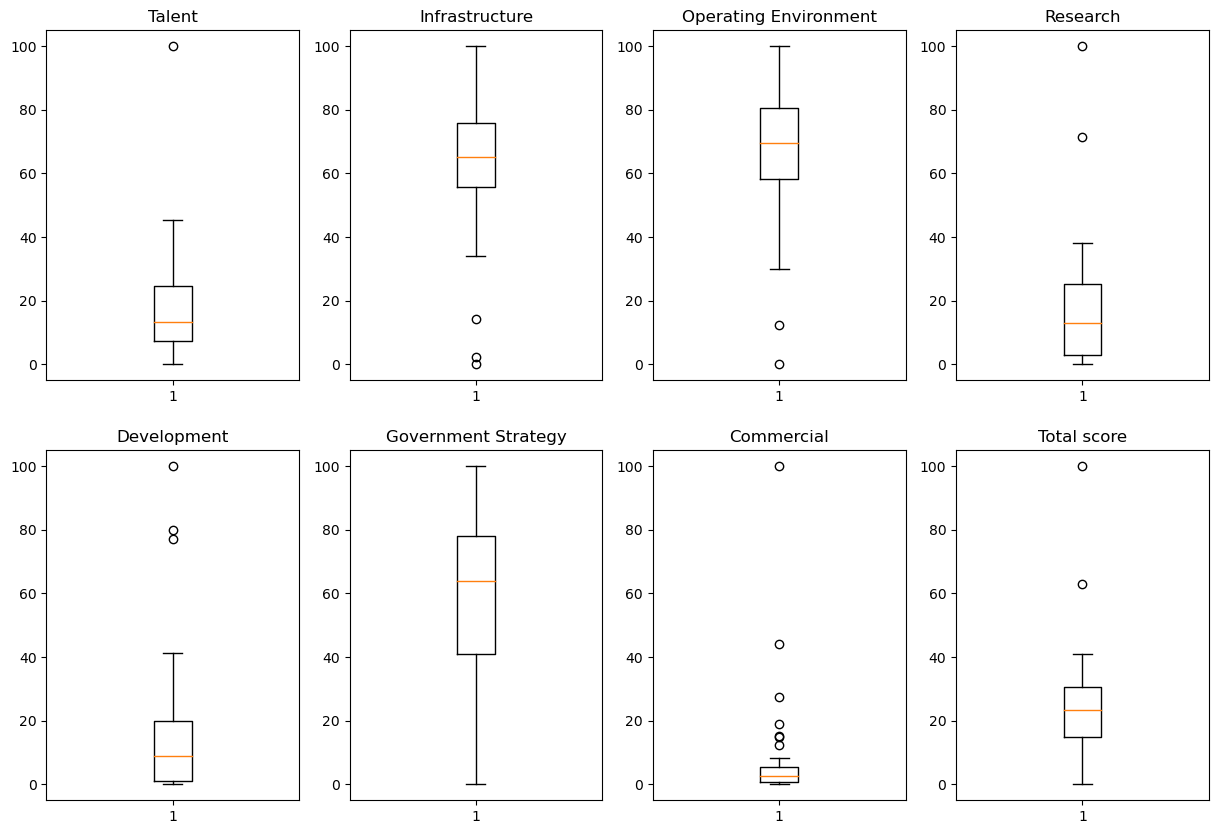

In [23]:
fig,ax = plt.subplots(2,4,figsize=(15,10))
data_name = ['Talent', 'Infrastructure', 'Operating Environment', 'Research','Development' ,'Government Strategy' ,'Commercial' ,'Total score']
axes = [ax[0,0],ax[0,1],ax[0,2],ax[0,3],ax[1,0],ax[1,1],ax[1,2],ax[1,3]]

for n in range(8):
    axes[n].boxplot(df.loc[:,data_name[n]])
    axes[n].set_title(data_name[n])
    
plt.show()  

So, there is a number of outliers being observed in the dataset (except the Government Strategy data column)

In [95]:
# Let's analyze data from boxplot to remove outliers with IQR
# 1.Extract rows of outliers through 8 attributes and then establish a new dataframe wit outliers-free data

outliers_free_df=df.copy()
print(outliers_free_df.shape)
for i in range(1,9):
    column = outliers_free_df.columns[i]
    first_quantile = np.quantile(outliers_free_df.iloc[:,i], 0.25)
    third_quantile = np.quantile(outliers_free_df.iloc[:,i], 0.75)
    iqr = third_quantile - first_quantile
    lower_lim = int(first_quantile - iqr*1.5)
    upper_lim = int(third_quantile + iqr*1.5)
    outliers_free_df.drop(outliers_free_df[outliers_free_df[column]<lower_lim].index,inplace=True)
    outliers_free_df.drop(outliers_free_df[outliers_free_df[column]>upper_lim].index,inplace=True)

print(outliers_free_df.shape)

(62, 13)
(50, 13)


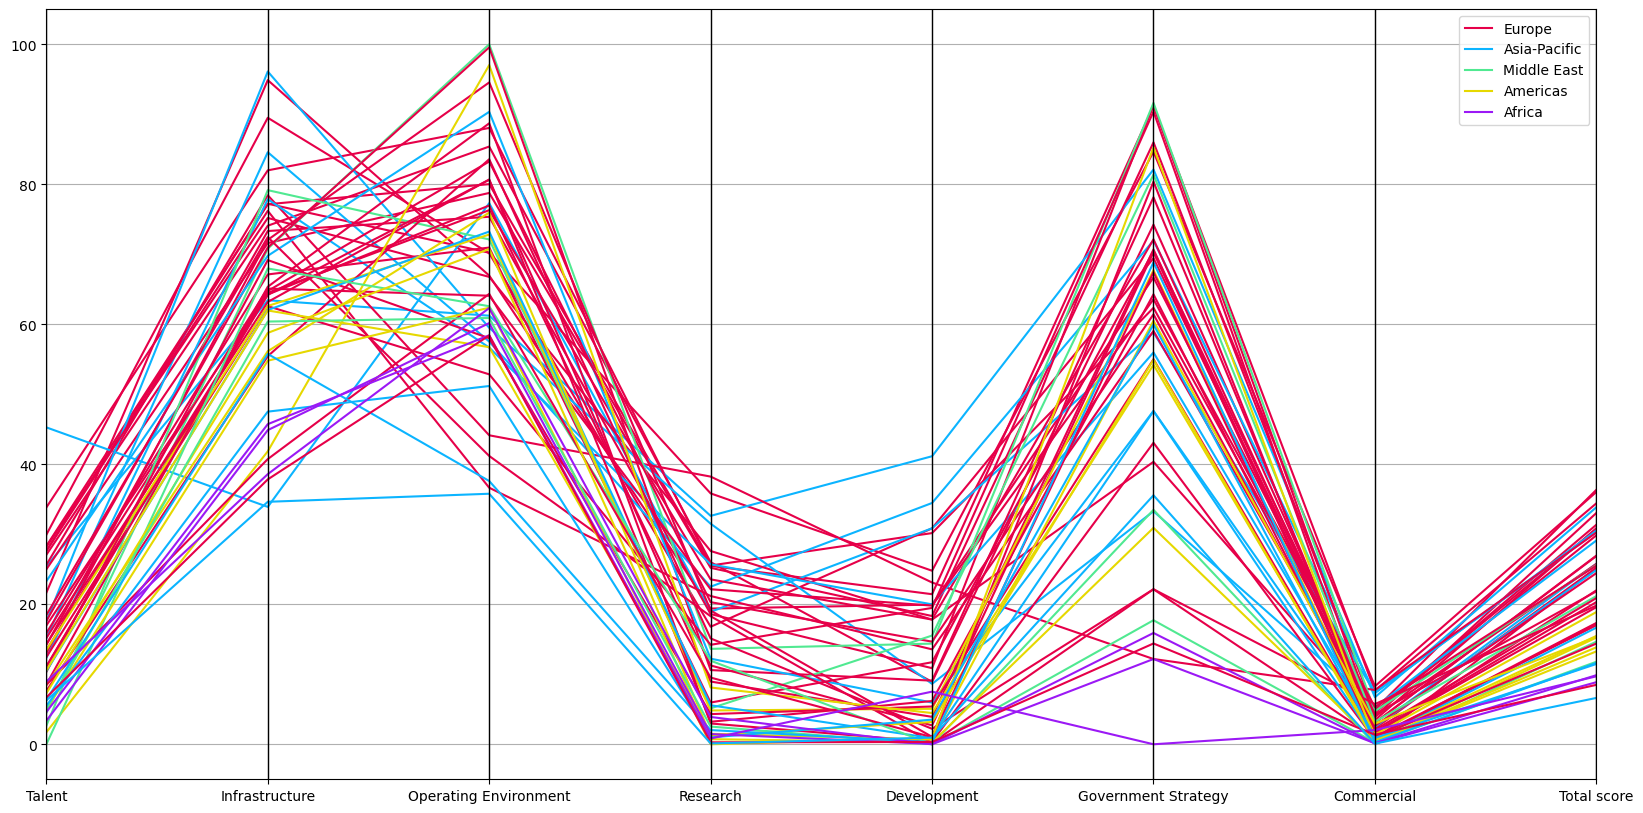

In [61]:
# Now, let's replot
plt.figure(figsize=(20,10))
pd.plotting.parallel_coordinates(outliers_free_df.iloc[:,1:10], 'Region',color=("#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff"));

A much clearer pattern has occured once we have removed the outliers.

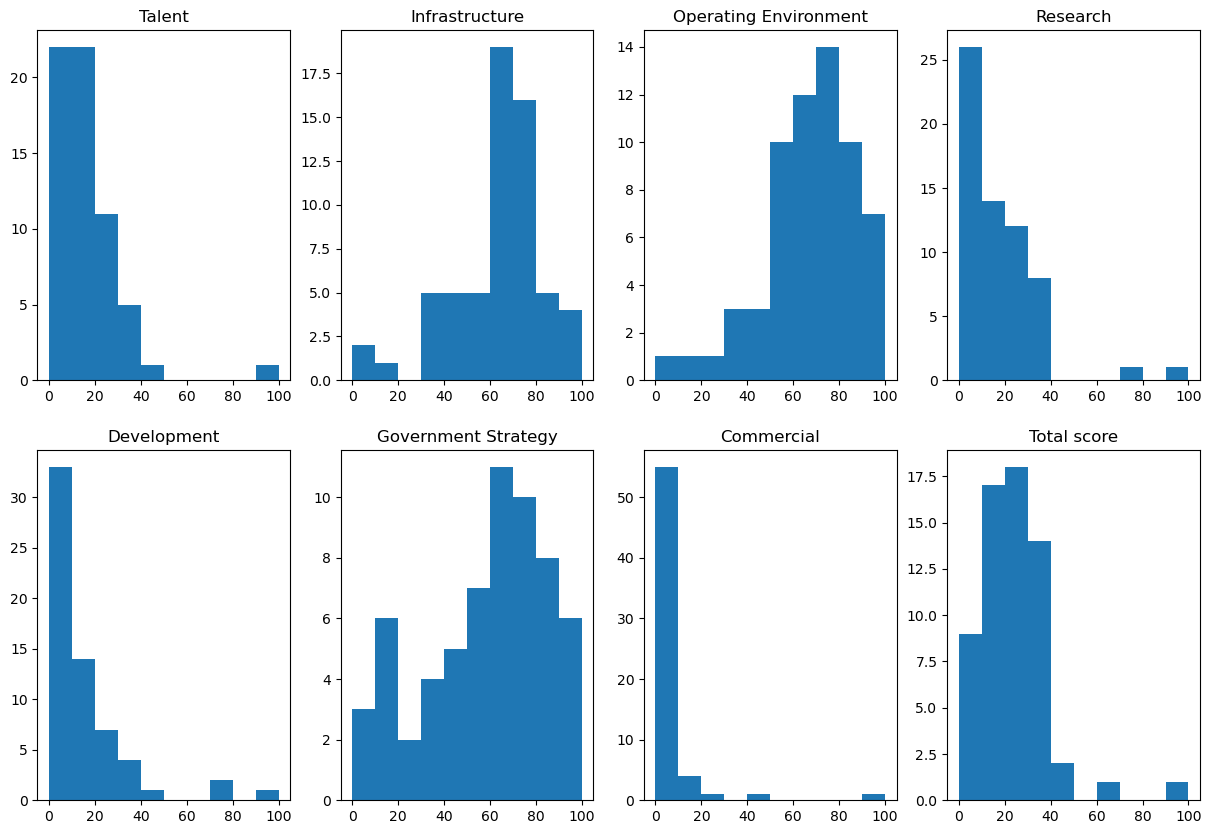

In [86]:
# Let's check the histogram chart
fig,ax = plt.subplots(2,4,figsize=(15,10))
data_name = ['Talent', 'Infrastructure', 'Operating Environment', 'Research','Development' ,'Government Strategy' ,'Commercial' ,'Total score']
axes = [ax[0,0],ax[0,1],ax[0,2],ax[0,3],ax[1,0],ax[1,1],ax[1,2],ax[1,3]]

for n in range(8):
    axes[n].hist(df.loc[:,data_name[n]], bins=10)
    axes[n].set_title(data_name[n])
    
plt.show()  

Histogram helps to to see a more striking distribution of each attributes. We can see that Government Strategy is the most equally distributed aspect in AI Investment measurement over the world. Other factors are more greatly disproportionate amongst countries.

# Insights Conclusion

Through analyzing this data set, I have drawed out some key patterns and insights:
    
    1. The US, China and Canada are the 3 strongest country in AI overall evaluation. In contrast with that, Kenya, Nigeria, and Pakistan are the 3 lowest-ranked in this field.
    
    2. Most powerful players in AI Development are in Americas, and Asia-Pacific. Especially, Asia-Pacific is the most promised one as it has a very strong combination of powerful players, rising stars and waking ups. In addition, Europe is starting to get more involved in this field as it has the highest Waking ups investors. In Africa and North-East, there is also a positive signal of waking ups participation.
    
    3. 2 strongest correlations amongst specific attributes to the Total score are (Research and Talent) and (Operations and Infrastructure)
    
    4. The majority of observed countries have highest score on Infrastructure, Operating Environment and Government Strategy. Other 4 factors which are Talents, Research, Development, and Commercial are still pretty low.
    
    5. Some outlier-countries which are stronger in specific aspects in the AI race are The US, China, The UK, Canada, Israel, Singapore and Estonia. Weaker countries on this field are Kenya, Nigeria, Egypt, and Pakistan.